# Performing Exploratory Data Analysis on "Indian Premiere League".

1) As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

2) Suggest teams or players a company should endorse for its products.

In [6]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt

In [7]:
scores_df=pd.read_csv("C:\\Users\\Karan\\Desktop\\deliveries.csv")
matches_df=pd.read_csv("C:\\Users\\Karan\\Desktop\\matches.csv")

In [10]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
scores_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


 # Match and Scores Information

In [12]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [13]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# Total Matches Given in the Dataset

In [14]:
matches_df['id'].max()

11415

In [15]:
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [16]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [17]:
scores_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


# Matches Won with Maximum and Minimum wickets and Runs.

In [18]:
matches_df.iloc[matches_df['win_by_runs'].idxmax]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [19]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [20]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [21]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [22]:
matches_df.iloc[matches_df['win_by_runs'].idxmin]

id                                                       2
season                                                2017
city                                                  Pune
date                                            2017-04-06
team1                                       Mumbai Indians
team2                               Rising Pune Supergiant
toss_winner                         Rising Pune Supergiant
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                              Rising Pune Supergiant
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

In [23]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [24]:
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

In [25]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

In [26]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

INFERENCE:
    1. Mumbai Indians is the team which is won by maximum and minimum runs.
    2. Kolkata Knight Riders is the team which is won by maximum and minimum wickets.

# Winners of most of the matches :


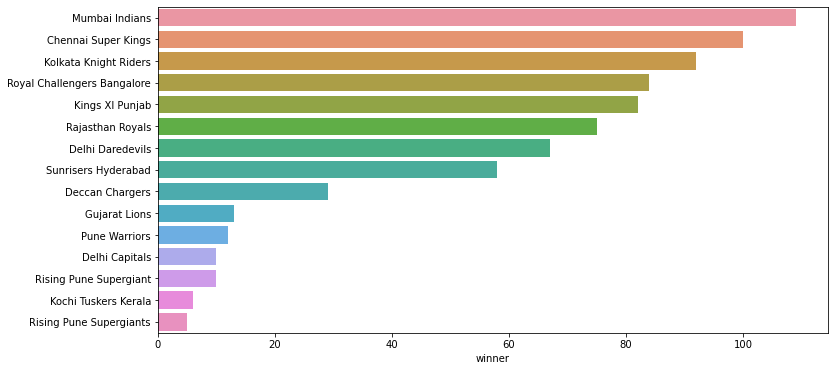

In [27]:
plt.figure(figsize=(12,6))
dataset = matches_df.winner.value_counts()
sb.barplot(y = dataset.index, x = dataset, orient='h')
plt.show()

INFERENCE: 
    1. MI is the winners of the most of the matches.

# Seasons that have most number of matches

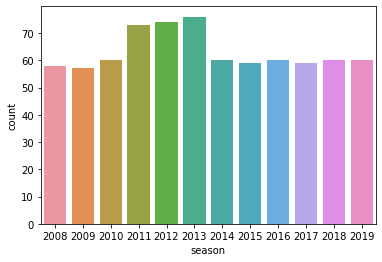

In [28]:
sb.countplot(x='season', data=matches_df)
k=matches_df.season.value_counts()
k
plt.show()

INFERENCE: In the season 2013, most of the matches are played.

# Most winning Teams 

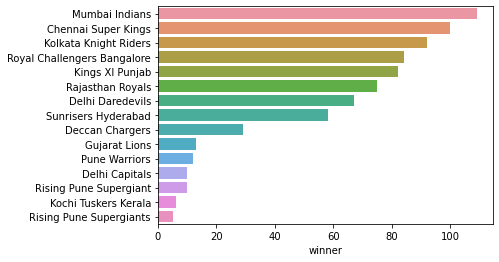

In [29]:
dataset = matches_df.winner.value_counts()
sb.barplot(y = dataset.index, x = dataset, orient='h')
plt.show()

INFERENCE:
    1. MI is the team that wins most of the matches.

## TOSS DECISIONS OF THE TEAMS IN DIFFERENT SEASONS

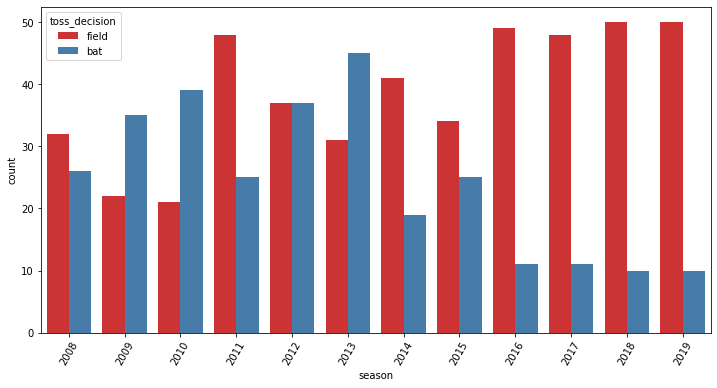

In [17]:
plt.figure(figsize=(12,6))
sb.countplot(x='season', hue='toss_decision', data=matches_df, palette ='Set1')
plt.xticks(rotation=60)
plt.show()

INFERENCE:
    Most of the team has choosen fielding after 2016 season.

# Most Valuable and Top Players of the matches

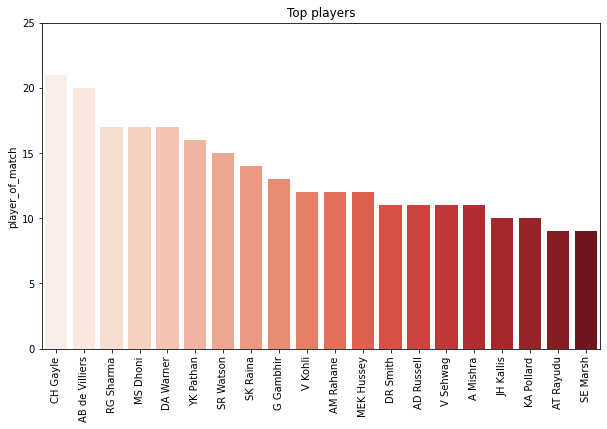

In [30]:
top_players = matches_df.player_of_match.value_counts()[:20]

fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylim([0,25])
ax.set_ylabel("Count")
ax.set_title("Top players")
top_players.plot.bar()
sb.barplot(x = top_players.index, y = top_players, orient='v', palette="Reds");
plt.show()



INFERENCE:
    1. Chris Gayle is the most performed and top player among all other players.

# Matches played in each venues.

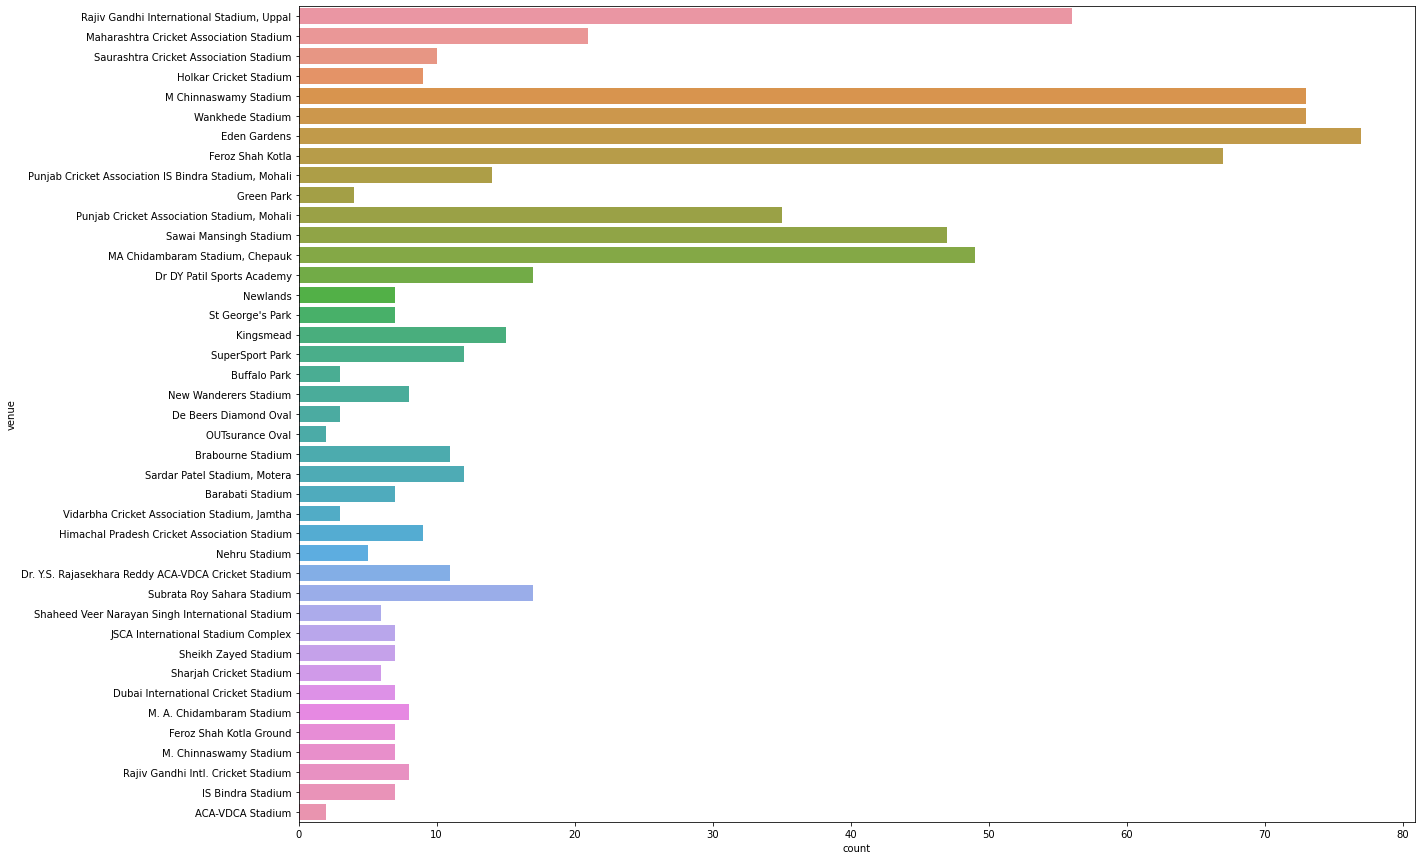

In [31]:
plt.figure(figsize=(20,15))
sb.countplot(y='venue', data=matches_df)
k=matches_df['venue'].count()
k
plt.xticks(rotation='horizontal')
plt.show()

INFERENCE:
    Eden Garden is the stadium where most of the matches are played.

# Most run scored player in total season.

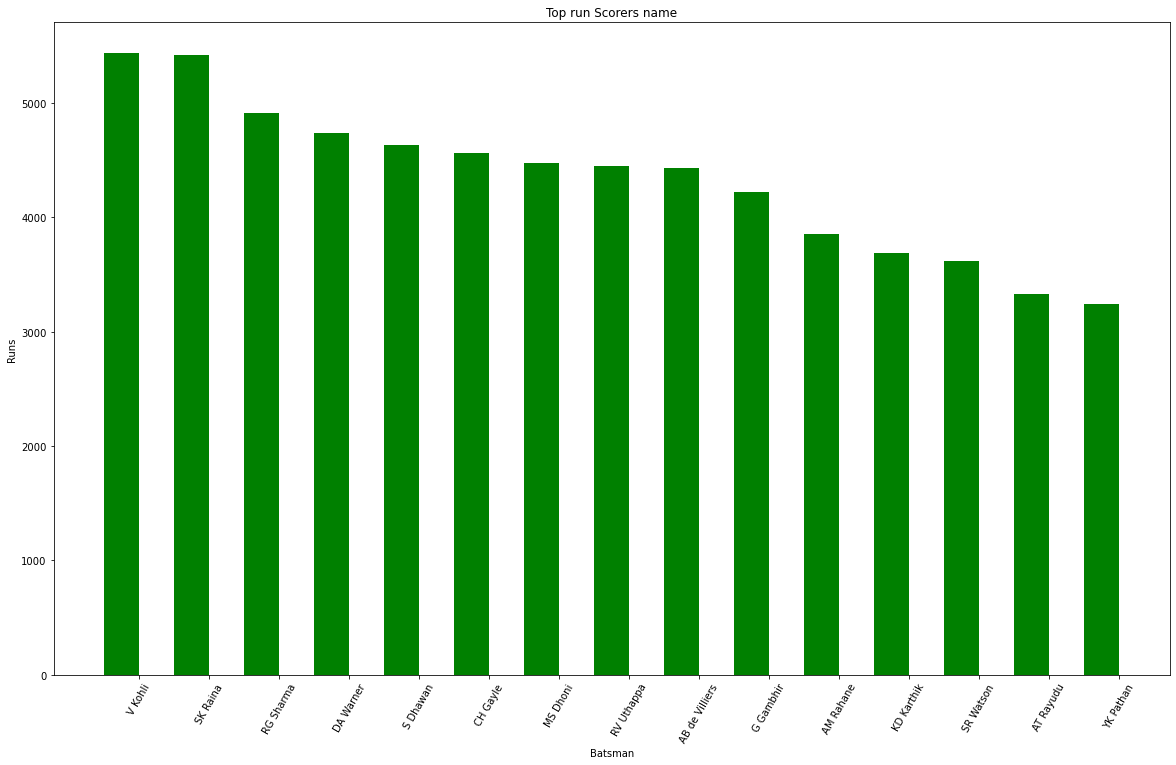

In [32]:

k_df = scores_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
k_df = k_df.iloc[:15,:]

labels = np.array(k_df['batsman'])
ind = np.arange(len(labels))
width=0.5
fig, ax = plt.subplots(figsize=(20,12))
rects = ax.bar(ind, np.array(k_df['batsman_runs']), width=width, color='Green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=60)
ax.set_ylabel("Runs")
ax.set_title("Top run Scorers name")
ax.set_xlabel('Batsman')
plt.show()

Inference:
    1. Virat Kohli is the player who scored most runs in all seasons.

# players with most number of 2's.

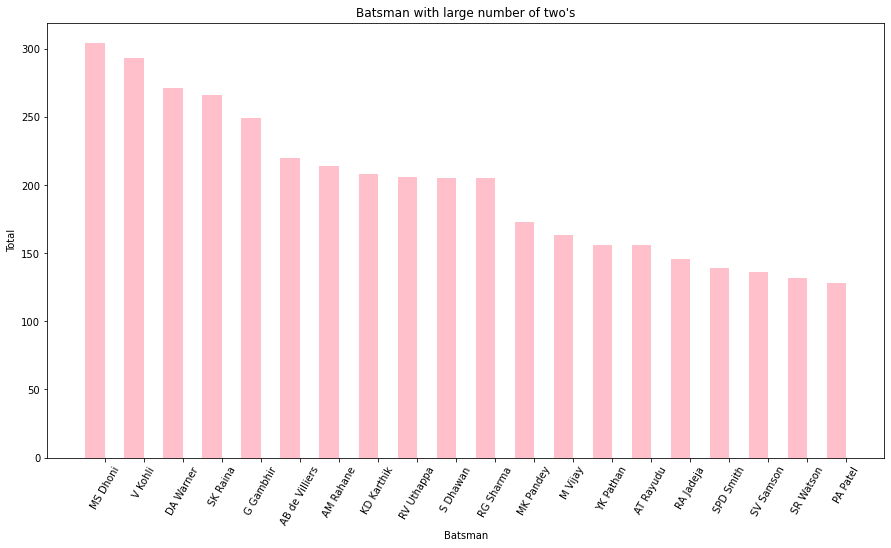

In [42]:
two_df = scores_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==2).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
two_df = two_df.iloc[:20,:]

labels = np.array(two_df['batsman'])
ind = np.arange(len(labels))
width = 0.5
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(two_df['batsman_runs']), width=width, color='pink')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=60)
ax.set_ylabel("Total")
ax.set_title("Batsman with large number of two's")
ax.set_xlabel('Batsman')
plt.show()

In [ ]:
INFERENCE:
    MS Dhoni has scored most number of double runs.

# Players most no of Six's

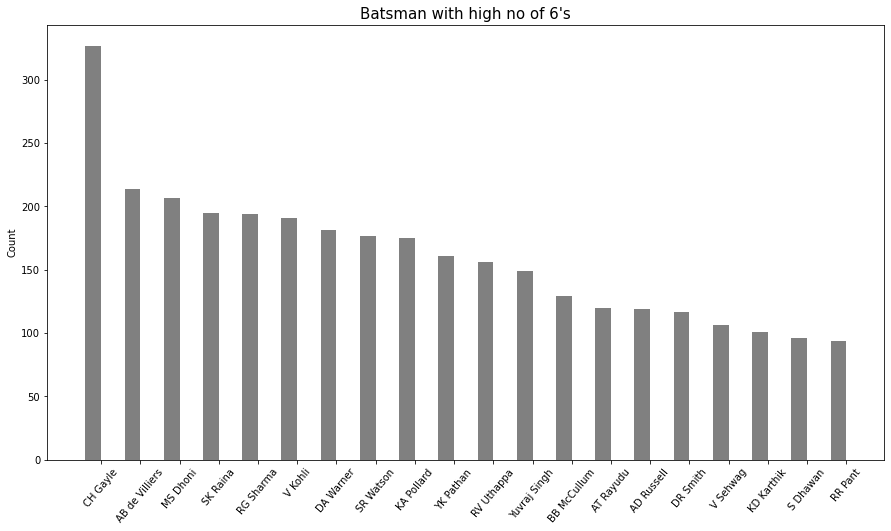

In [40]:

six_df = scores_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
six_df = six_df.iloc[:20,:]

labels = np.array(six_df['batsman'])
ind = np.arange(len(labels))
width = 0.4
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(six_df['batsman_runs']), width=width, color='grey')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=50)
ax.set_ylabel("Count")
ax.set_title("Batsman with high no of 6's",fontsize = 15)
plt.show()

INFERENCE:
    Chris Gyale has hits the most number of 6's.

#

#

#                                                  THANK YOU